First 5 rows:


,Material,Length_mm,Width_mm,Height_mm,Volume_mm3,Cycle_Time_min,Quoted_Cost
0,Brass,190.635718,149.078849,61.872556,1.758403e+06,5417.581061,34226.912213
1,Titanium,97.257289,73.404636,18.572348,1.325905e+05,186.705228,3464.127058
2,Brass,188.325015,10.147966,99.260098,1.896975e+05,283.296708,3451.495500
3,Plastic,92.069554,65.333537,63.126025,3.797175e+05,1224.422772,4396.995996
4,Titanium,82.667778,196.813868,49.342475,8.028102e+05,914.958100,20802.221962



Data types:
Material           object
Length_mm         float64
Width_mm          float64
Height_mm         float64
Volume_mm3        float64
Cycle_Time_min    float64
Quoted_Cost       float64
dtype: object

Missing values per column:
Material          0
Length_mm         0
Width_mm          0
Height_mm         0
Volume_mm3        0
Cycle_Time_min    0
Quoted_Cost       0
dtype: int64

Duplicate rows count:
0

Descriptive statistics:


,Length_mm,Width_mm,Height_mm,Volume_mm3,Cycle_Time_min,Quoted_Cost
count,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000
mean,108.504051,108.761467,51.950769,5.894429e+05,1242.816795,10905.788581
std,51.212281,54.728802,27.011885,5.384100e+05,1410.527491,11962.343017
min,11.431529,10.147966,5.440042,8.100534e+03,28.241935,154.288212
25%,71.530973,64.773706,29.021088,1.715407e+05,299.921031,2597.403398
50%,108.894354,111.067486,50.203471,4.555226e+05,755.440679,6825.814808
75%,146.673664,156.692433,75.145056,8.650856e+05,1610.365785,14936.150201
max,198.964597,197.945133,99.260098,2.719856e+06,10800.767098,76637.023178


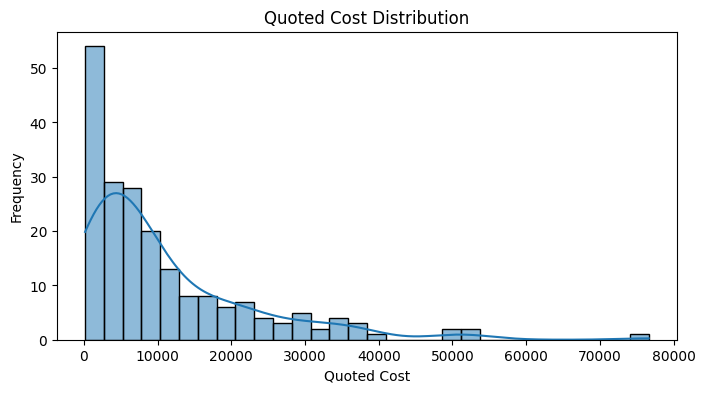

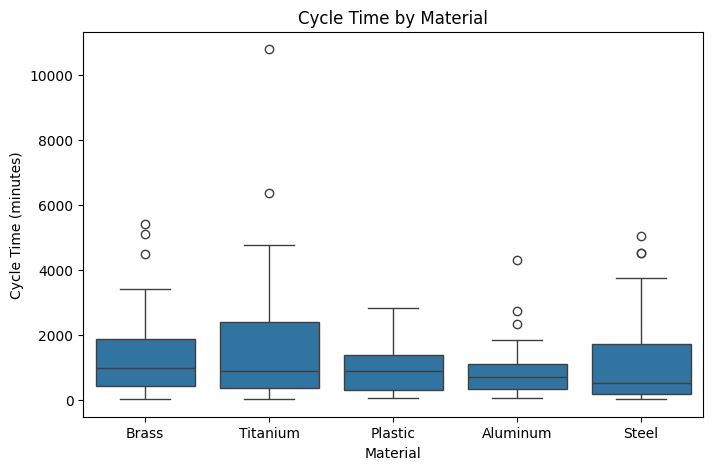

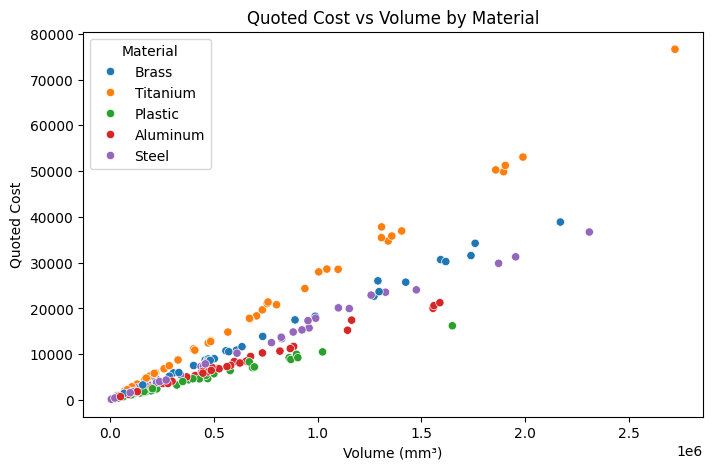

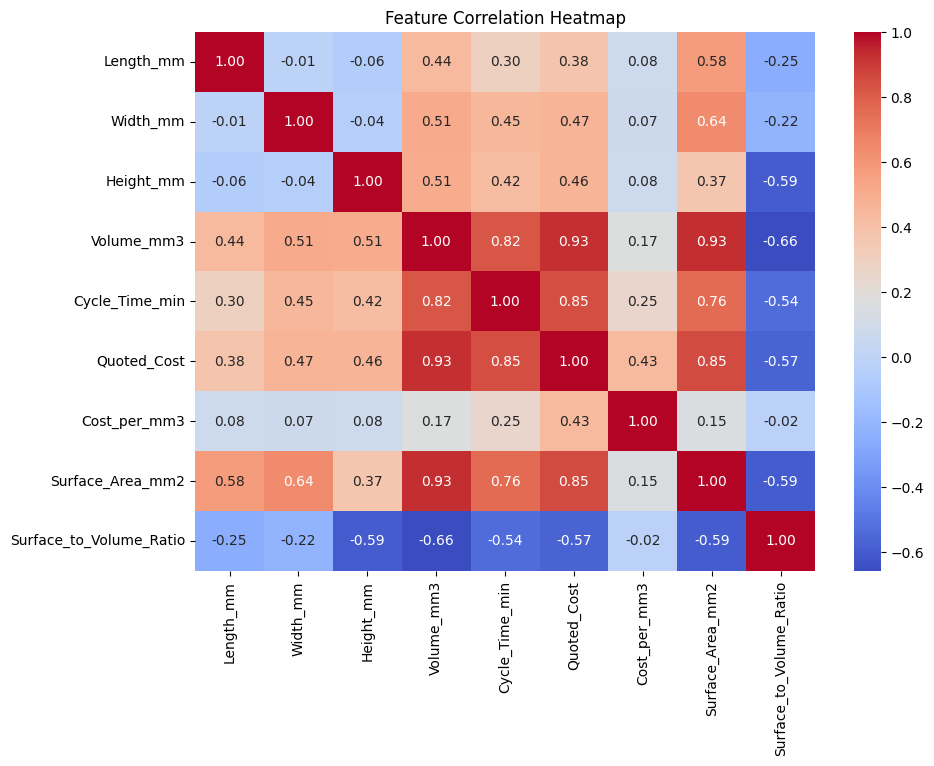

Model Performance on Test Set:
MAE: 1317.06
RMSE: 2749.63
R²: 0.95


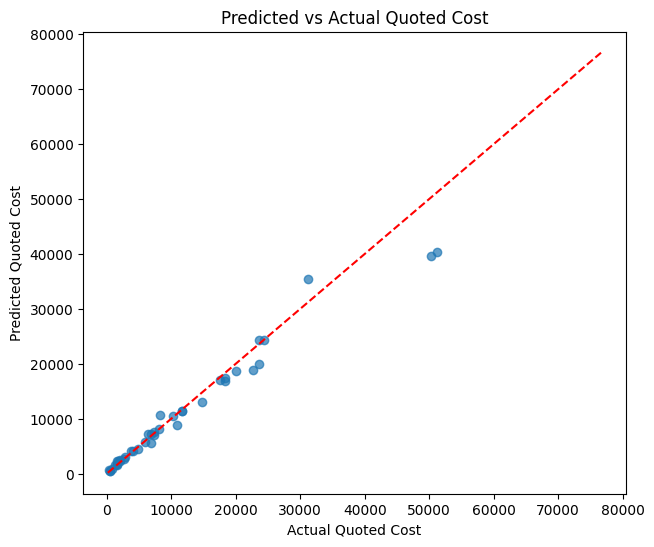

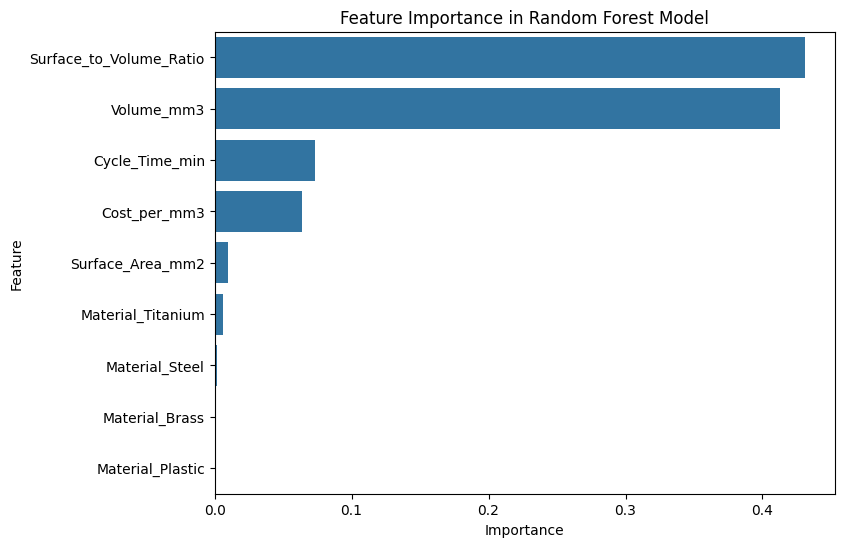

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
_df_12['Length_mm'].plot(kind='hist', bins=20, title='Length_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Width_mm'].plot(kind='hist', bins=20, title='Width_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Height_mm'].plot(kind='hist', bins=20, title='Height_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Volume_mm3'].plot(kind='hist', bins=20, title='Volume_mm3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Length_mm', y='Width_mm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='Width_mm', y='Height_mm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='Height_mm', y='Volume_mm3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='Volume_mm3', y='Cycle_Time_min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Length_mm'].plot(kind='line', figsize=(8, 4), title='Length_mm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Width_mm'].plot(kind='line', figsize=(8, 4), title='Width_mm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Height_mm'].plot(kind='line', figsize=(8, 4), title='Height_mm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['Volume_mm3'].plot(kind='line', figsize=(8, 4), title='Volume_mm3')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

np.random.seed(42)

materials = ['Aluminum', 'Steel', 'Titanium', 'Brass', 'Plastic']
data = []
for _ in range(200):
    material = np.random.choice(materials)
    length = np.random.uniform(10, 200)
    width = np.random.uniform(10, 200)
    height = np.random.uniform(5, 100)
    volume = length * width * height
    cycle_time = volume / np.random.uniform(200, 1000) + np.random.uniform(2, 15)
    material_cost_factor = {'Aluminum':1.2,'Steel':1.5,'Titanium':2.5,'Brass':1.7,'Plastic':0.9}[material]
    estimated_cost = volume * material_cost_factor * 0.01 + cycle_time * 0.8
    data.append([material,length,width,height,volume,cycle_time,estimated_cost])

df = pd.DataFrame(data, columns=['Material','Length_mm','Width_mm','Height_mm','Volume_mm3','Cycle_Time_min','Quoted_Cost'])

print("First 5 rows:")
display(df.head())

print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nDuplicate rows count:")
print(df.duplicated().sum())

print("\nDescriptive statistics:")
display(df.describe())

df['Cost_per_mm3'] = df['Quoted_Cost'] / df['Volume_mm3']
df['Surface_Area_mm2'] = 2 * (df['Length_mm']*df['Width_mm'] + df['Width_mm']*df['Height_mm'] + df['Height_mm']*df['Length_mm'])
df['Surface_to_Volume_Ratio'] = df['Surface_Area_mm2'] / df['Volume_mm3']

plt.figure(figsize=(8,4))
sns.histplot(df['Quoted_Cost'], bins=30, kde=True)
plt.title("Quoted Cost Distribution")
plt.xlabel("Quoted Cost")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Material', y='Cycle_Time_min', data=df)
plt.title("Cycle Time by Material")
plt.ylabel("Cycle Time (minutes)")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='Volume_mm3', y='Quoted_Cost', hue='Material', data=df)
plt.title("Quoted Cost vs Volume by Material")
plt.xlabel("Volume (mm³)")
plt.ylabel("Quoted Cost")
plt.show()

plt.figure(figsize=(10,7))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

df_encoded = pd.get_dummies(df, columns=['Material'], drop_first=True)

feature_cols = ['Volume_mm3', 'Cycle_Time_min', 'Surface_Area_mm2', 'Cost_per_mm3', 'Surface_to_Volume_Ratio'] + \
               [col for col in df_encoded.columns if col.startswith('Material_')]

X = df_encoded[feature_cols]
y = df_encoded['Quoted_Cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model Performance on Test Set:\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}\nR²: {r2:.2f}")

plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Quoted Cost")
plt.ylabel("Predicted Quoted Cost")
plt.title("Predicted vs Actual Quoted Cost")
plt.show()

importances = model.feature_importances_
feat_imp_df = pd.DataFrame({"Feature": X.columns, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature')
plt.title("Feature Importance in Random Forest Model")
plt.show()

